In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Data Collection and Preprocessing

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#first 5 rows of the datafram
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#last 5 rows of the dataframe
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
#check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#check the missing values of the dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Visualization

<AxesSubplot:>

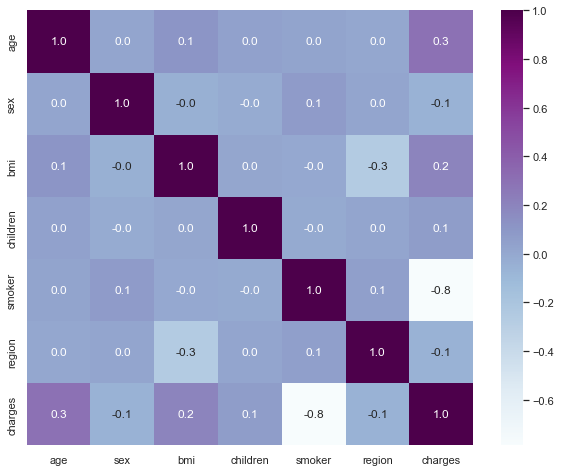

In [123]:
#checking the correlation

correlation = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation, cmap = "BuPu", annot = True, fmt = '.1f')

C:\Users\suyash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age distribution')

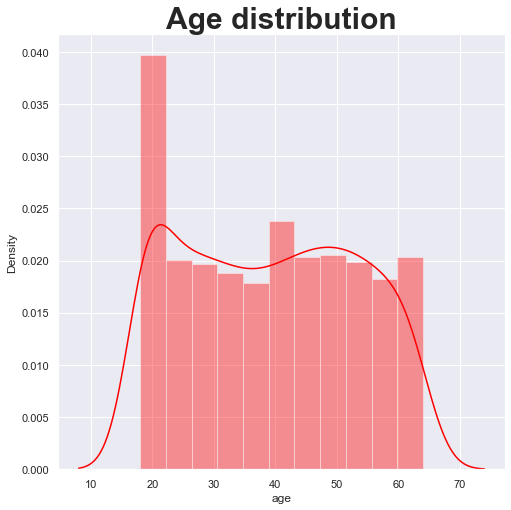

In [28]:
#checking the distribution of the Age value
sns.set() 

plt.figure(figsize = (8,8))
sns.distplot(df['age'], color = "Red")
plt.title("Age distribution", fontweight = "bold", fontsize = 30)


C:\Users\suyash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sex Distribution')

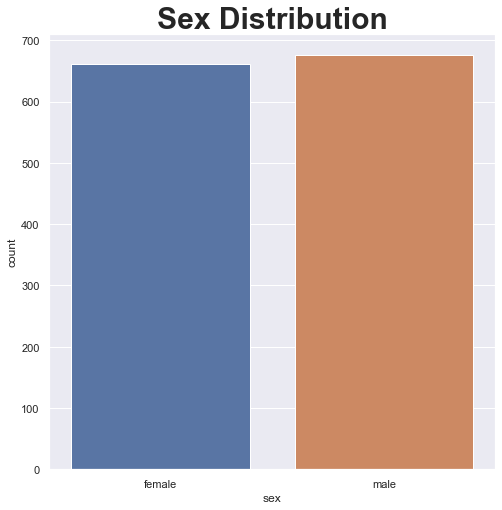

In [25]:
#check the Gender column 
#count the female and male

plt.figure(figsize = (8,8))

sns.countplot(df['sex'])
plt.title("Sex Distribution", fontweight = 'bold', fontsize = 30)



In [34]:
#count the female and male 

df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\suyash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of BMI')

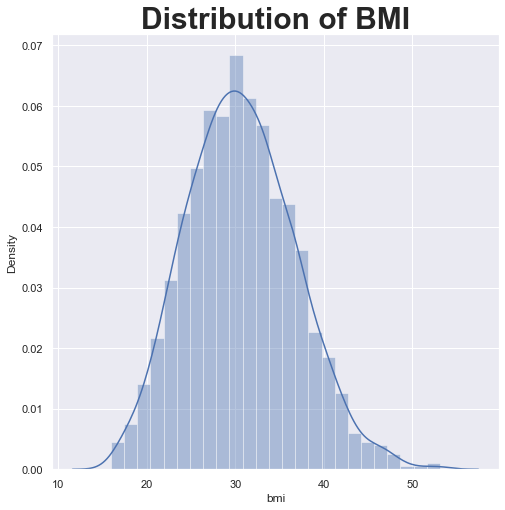

In [41]:
#distribution of bmi

plt.figure(figsize = (8,8))
sns.distplot(df['bmi'])
plt.title("Distribution of BMI", fontweight = "bold", fontsize = 30)

between 18.5 and 24.9

C:\Users\suyash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Children')

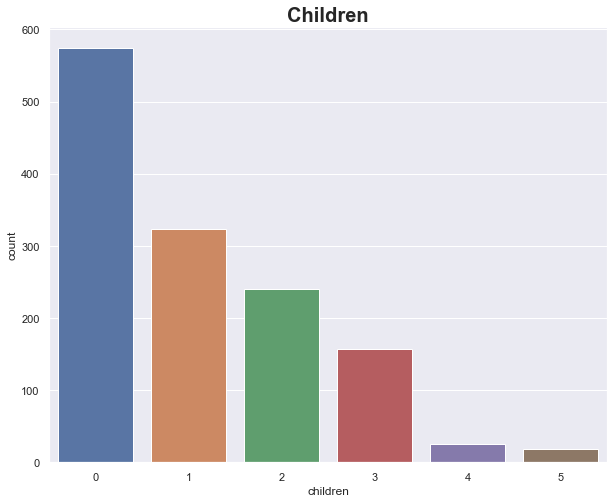

In [46]:
#children column
plt.figure(figsize = (10,8))

sns.countplot(df['children'])
plt.title("Children", fontweight = "bold", fontsize = 20)


In [50]:

df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Text(0.5, 1.0, 'Smoker')

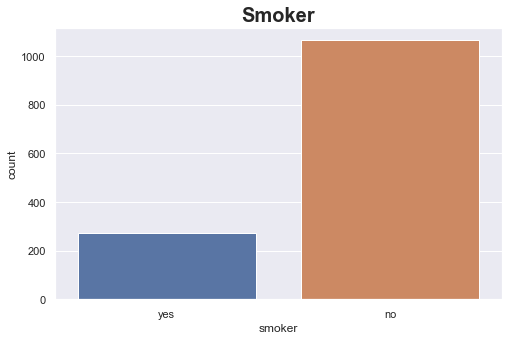

In [54]:
#Check the count of smoker 

plt.figure(figsize = (8,5))
sns.countplot(x = "smoker", data = df)
plt.title("Smoker", fontweight = "bold", fontsize = 20)

In [55]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\suyash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Region ')

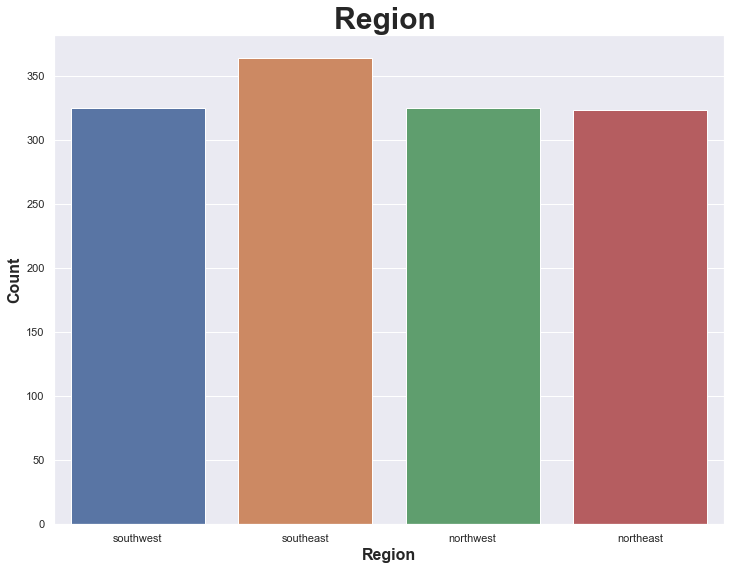

In [63]:
#Region column

plt.figure(figsize = (12,9))

sns.countplot(df['region'])
plt.xlabel("Region", fontweight = "bold", fontsize = 16)
plt.ylabel("Count", fontweight = "bold", fontsize = 16)
plt.title("Region ", fontweight = "bold", fontsize = 30)

In [64]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\suyash\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Charges Distribution')

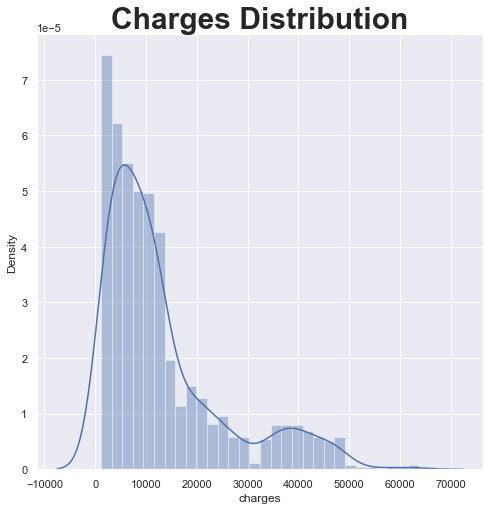

In [69]:
#distribution of charges value

plt.figure(figsize = (8,8))
sns.distplot(df['charges'])
plt.title('Charges Distribution', fontweight = "bold", fontsize = 30)

# Data Preprocessing

##### 1. Encoding the sex column


In [70]:
df.replace({'sex' :{'male' : 0, 'female':1}},inplace =True)

#### 2. Encoding the Smoker column

In [71]:
df.replace({'smoker' :{'yes': 0, 'no' : 1}}, inplace = True)

##### 3. Encoding the Region column

In [72]:
df.replace({'region' :{'southeast' :0, 'southwest' : 1, 'northeast': 2, 'northwest' : 3}},inplace= True)

In [73]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# Splitting the Features and Target

In [74]:
X = df.iloc[:,:-1]
X

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [76]:
y = df.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Splitting the data into Training data and Testing Data

In [77]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state= 20)

In [78]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


### Model Training 

In [85]:
model = LinearRegression()

In [86]:
model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation 

In [87]:
#Prediction on training data

training_data_pred = model.predict(X_train)

In [89]:
#R squared value
r2_train = metrics.r2_score(y_train, training_data_pred)
r2_train

0.7381729420693834

In [98]:
#mean square error value
mse_train = metrics.mean_squared_error(y_train,training_data_pred)

mse_train

38113416.31637814

In [99]:
#prediction on testing data

testing_data_pred = model.predict(X_test)

In [100]:
#R squared value
r2_test = metrics.r2_score(y_test, testing_data_pred)
r2_test

0.7961899141555491

In [101]:
#mean square error value
mse_test = metrics.mean_squared_error(y_test,testing_data_pred)

mse_test

30647547.527124684

# Building a Predictive System

In [112]:
input_data = (19, 1, 25.74, 0, 1, 0)

#changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshape)
print(prediction)



[940.62921176]


In [113]:
print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  940.6292117649682
